# <p style="text-align: center;"> <b> Data Reading and Observation </b> </p>

In [1]:
# import needed libraries
import pandas as pd
import numpy as np

# read excel file
df = pd.read_csv('data/House_Rent_modified.csv')

# display general information of the df
display(df.info())

# display 5 random samples of our df
display(df.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4723 non-null   float64
 2   Rent               4723 non-null   float64
 3   Size               4746 non-null   int64  
 4   Floor              4746 non-null   object 
 5   Area Type          4746 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4723 non-null   object 
 10  Bathroom           4746 non-null   int64  
 11  Point of Contact   4723 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 445.1+ KB


None

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
3979,2022-05-06,2.0,12000.0,1000,2 out of 3,Super Area,"Nallagandla, Serilingampally",Hyderabad,Unfurnished,Bachelors/Family,1,Contact Owner
3751,2022-05-06,1.0,5000.0,550,1 out of 1,Carpet Area,"Tambaram, GST Road",Chennai,Unfurnished,Bachelors/Family,1,Contact Owner
1975,2022-05-17,2.0,10000.0,300,Ground out of 4,Carpet Area,"Aditya Nagar-Vidyaranyapura, Vidyaranyapura",Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
839,2022-05-19,5.0,450000.0,3400,2 out of 5,Carpet Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,5,Contact Agent
4256,2022-06-02,2.0,8500.0,700,2 out of 3,Super Area,Budwel,Hyderabad,Semi-Furnished,Bachelors/Family,1,Contact Owner


# <p style="text-align: center;"> <b>Feature Descriptions</b> </p>

Its clear from the summary above that the coulms (BHK, Rent, Tenant Preferred, Point of Contact) has some NaN values and need to be fixed. We will replace categorical data with the mode of the coulmns and the numrical data with the mean of the coulmn.

---

Here are the features with their types and description:

|         Name         |    Description    |                 Type                 |
| :-------------------: | :---------: | :------------------------------------------: |
BHK | Number of Bedrooms, Hall, Kitchen. | Numerical |
Rent | Rent of the Houses/Apartments/Flats. | Numerical |
Size | Size of the Houses/Apartments/Flats in Square Feet. | Numerical |
Floor | Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.) | Ordinal |
Area Type | Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area. | Ordinal |
Area Locality | Locality of the Houses/Apartments/Flats. | Categorical |
City | City where the Houses/Apartments/Flats are Located. | Categorical |
Furnishing Status | Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished. | Categorical |
Tenant Preferred | Type of Tenant Preferred by the Owner or Agent. | Categorical |
Bathroom | Number of Bathrooms. | Numerical |
Point of Contact | Whom should you contact for more information regarding the Houses/Apartments/Flats. | Categorical |



In [2]:
# lets fix the nan values

for col in df.columns:
    # check if the column is of object type
    if df[col].dtype == 'object':
        # replace missing values with the most occurred string
        value = df[col].mode()[0]
    else:
        # if the values are nominal(0, 1, nan) replace with mod
        if len(df[col].unique()) == 3:
            # replace missing values with the mode value
            value = df[col].mode()[0]

        else:
            # replace missing values with the mean value
            value = df[col].mean()
            
    df[col].fillna(value, inplace = True)
                
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4746 non-null   float64
 2   Rent               4746 non-null   float64
 3   Size               4746 non-null   int64  
 4   Floor              4746 non-null   object 
 5   Area Type          4746 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4746 non-null   object 
 10  Bathroom           4746 non-null   int64  
 11  Point of Contact   4746 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 445.1+ KB


None

In [3]:
display(df.describe())

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.082786,3.503060e+04,967.490729,1.965866
std,0.829721,7.806837e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.400000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [4]:
# now we need to remove the outliers
# print(df.columns)

for col in df.columns:
    if df[col].dtype != 'object':
        Q3, Q1 = np.percentile(df[col], [75 ,25])
        IQR = Q3 - Q1
        
        # calculate the upper and lower bounds for outliers
        upper_bound = Q3 + 1.5*IQR
        lower_bound = Q1 - 1.5*IQR
        
        
        # delete the rows containing outliers
        if len(df[col].unique()) != 2 and col not in ['LONGITUDE', 'LATITUDE']:
            df =df[(df[col] <= upper_bound) & (df[col] >= lower_bound)]
display(df.describe())
display(df.info())

,BHK,Rent,Size,Bathroom
count,4082.000000,4082.000000,4082.000000,4082.000000
mean,1.912479,18708.721015,824.649682,1.755022
std,0.692289,13290.839969,408.551671,0.642569
min,1.000000,1500.000000,10.000000,1.000000
25%,1.000000,9500.000000,500.000000,1.000000
50%,2.000000,15000.000000,800.000000,2.000000
75%,2.000000,24000.000000,1100.000000,2.000000
max,4.000000,67000.000000,1970.000000,3.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4082 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4082 non-null   object 
 1   BHK                4082 non-null   float64
 2   Rent               4082 non-null   float64
 3   Size               4082 non-null   int64  
 4   Floor              4082 non-null   object 
 5   Area Type          4082 non-null   object 
 6   Area Locality      4082 non-null   object 
 7   City               4082 non-null   object 
 8   Furnishing Status  4082 non-null   object 
 9   Tenant Preferred   4082 non-null   object 
 10  Bathroom           4082 non-null   int64  
 11  Point of Contact   4082 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 414.6+ KB


None

# <p style="text-align: center;"><b>Statistical Analysis</b></p>

In [5]:
# lets find the statistical summary of our data

print("this is the statistical summary of the the categorical data:")
display(df.describe(include='object'))
print("________________________________________________________________________________")

print("\nthis is the statistical summary of the the numerical data:")
display(df.describe(exclude='object'))

this is the statistical summary of the the categorical data:


,Posted On,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
count,4082,4082,4082,4082,4082,4082,4082,4082
unique,80,331,3,1955,6,3,3,3
top,2022-07-06,1 out of 2,Super Area,Electronic City,Bangalore,Semi-Furnished,Bachelors/Family,Contact Owner
freq,231,366,2302,24,828,1897,3025,3085


________________________________________________________________________________

this is the statistical summary of the the numerical data:


,BHK,Rent,Size,Bathroom
count,4082.000000,4082.000000,4082.000000,4082.000000
mean,1.912479,18708.721015,824.649682,1.755022
std,0.692289,13290.839969,408.551671,0.642569
min,1.000000,1500.000000,10.000000,1.000000
25%,1.000000,9500.000000,500.000000,1.000000
50%,2.000000,15000.000000,800.000000,2.000000
75%,2.000000,24000.000000,1100.000000,2.000000
max,4.000000,67000.000000,1970.000000,3.000000


# <p style="text-align: center;"><b>Data Visualization</b></p>

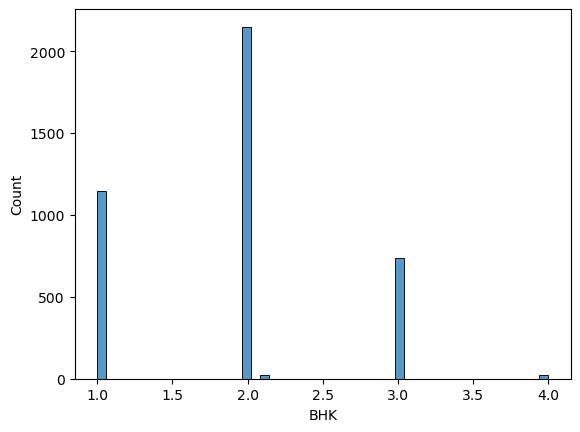

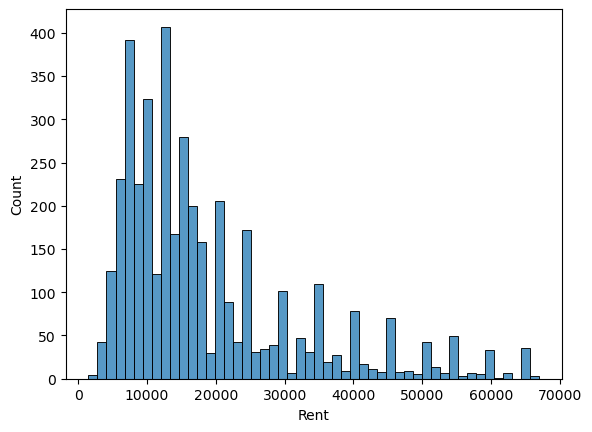

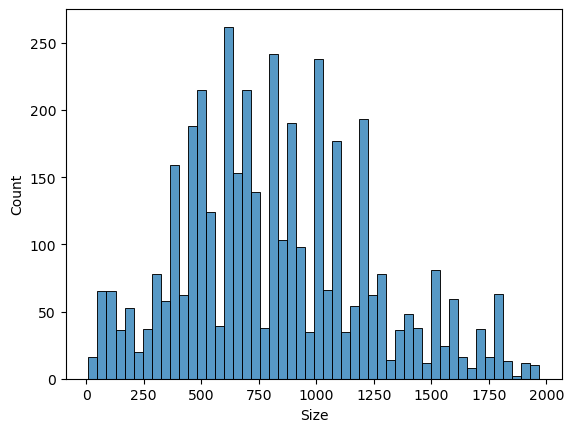

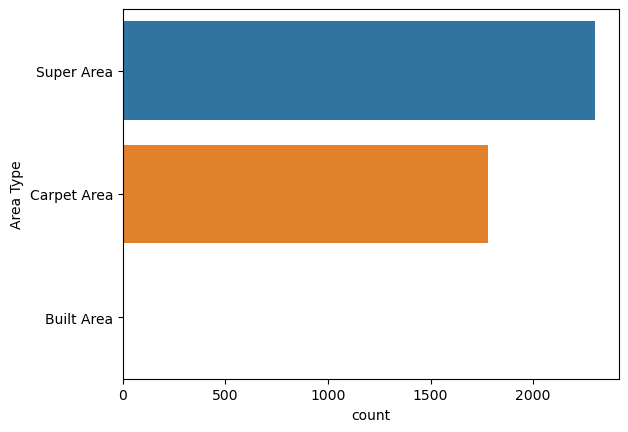

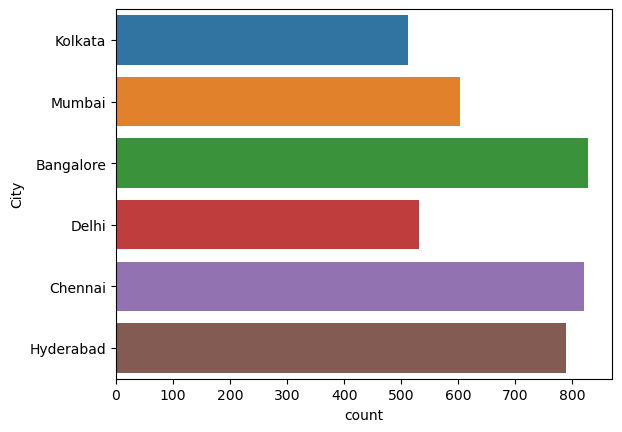

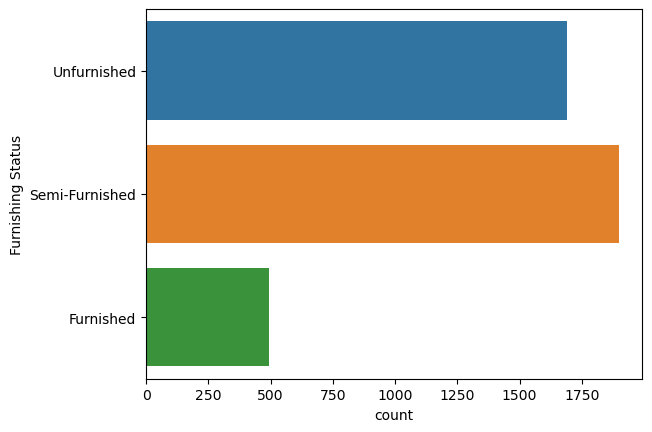

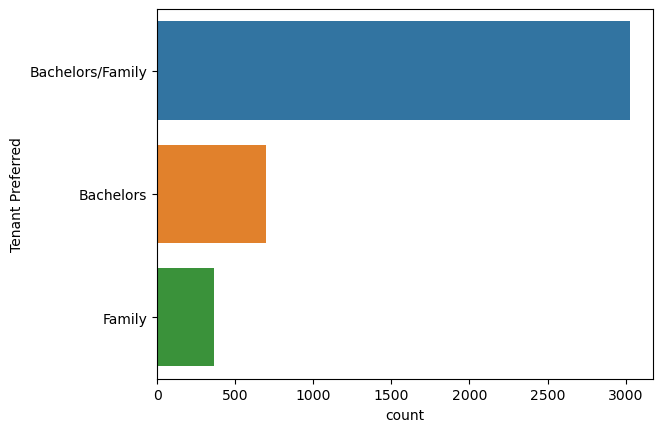

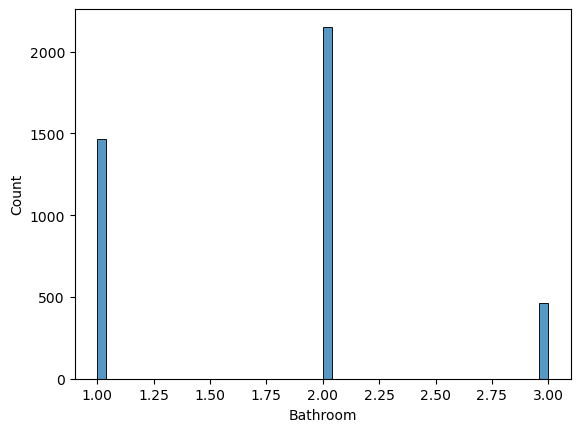

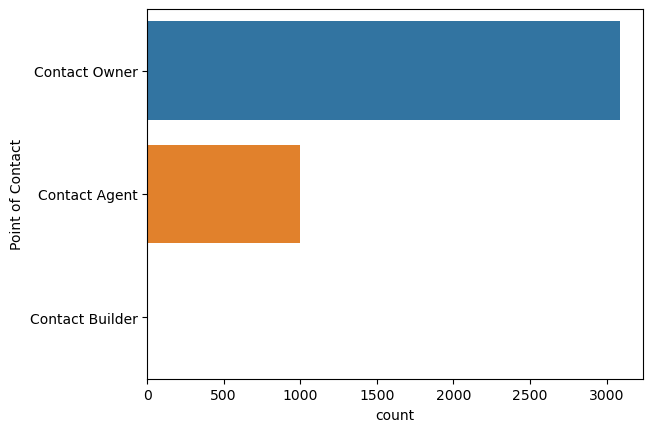

In [6]:
# histogram plots

import matplotlib.pyplot as plt
import seaborn as sns
for col in df.columns:
    if col != 'Posted On' and col != 'Floor' and col != 'Area Locality':
        if df[col].dtype == 'object':
            plt.figure()
            sns.countplot(y=col,data=df)
            plt.show()
        else:
            plt.figure()
            sns.histplot(x=col,bins=50,data=df)
            plt.show()

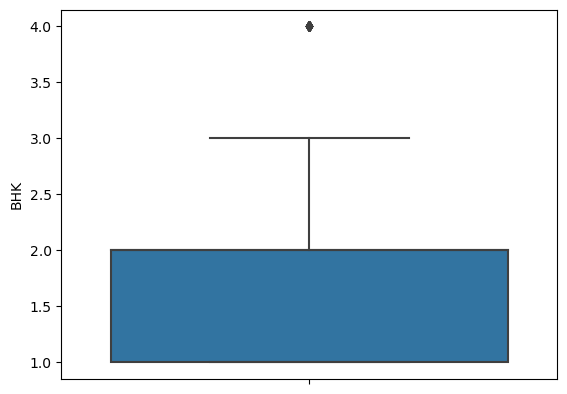

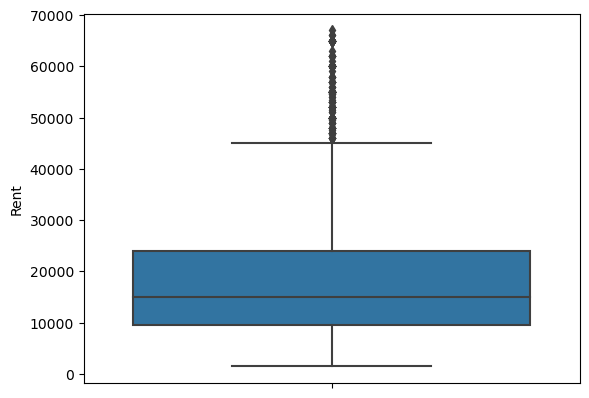

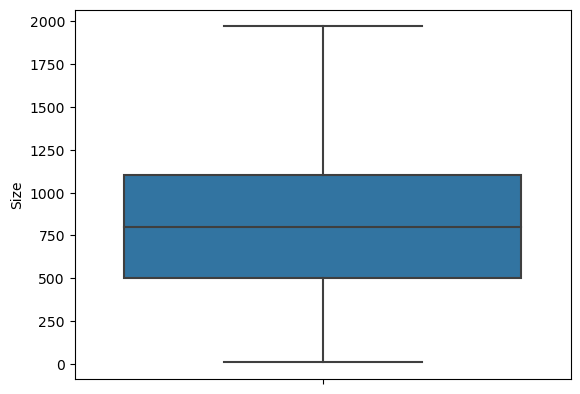

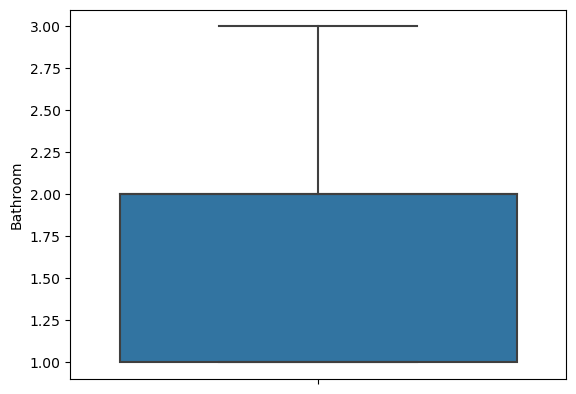

In [7]:
#Box plots

import matplotlib.pyplot as plt
import seaborn as sns

# Identify numeric columns
num_columns = df.select_dtypes(exclude='object').columns

for c in num_columns:
    plt.figure()
    sns.boxplot(y=c,data=df)
    plt.show()

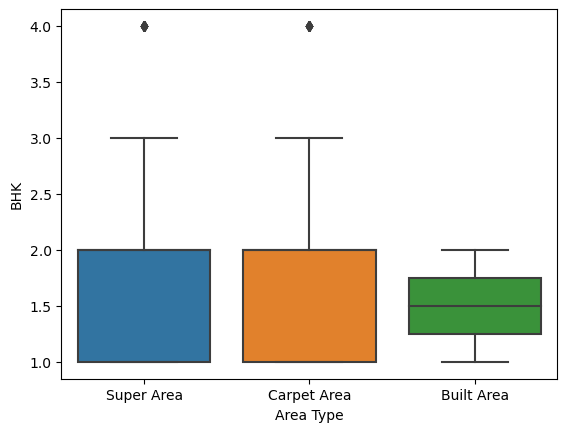

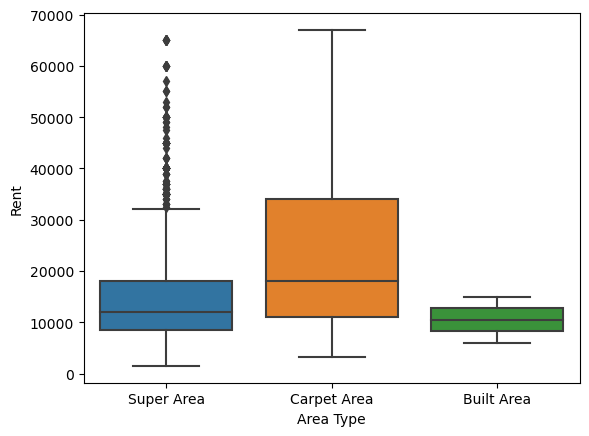

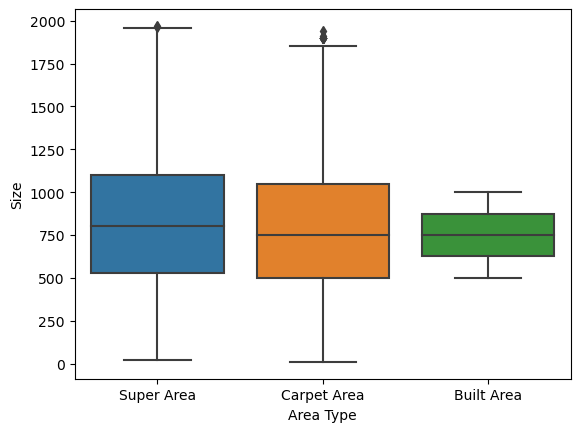

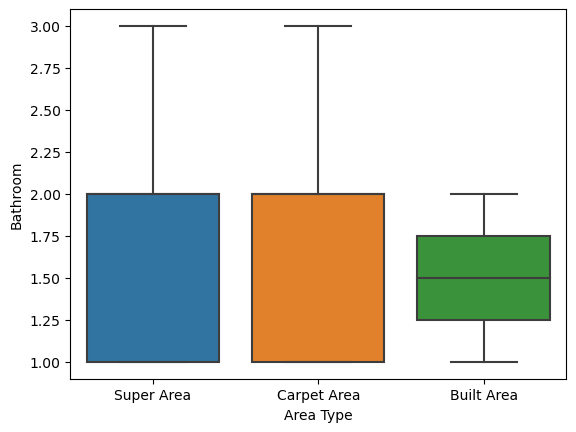

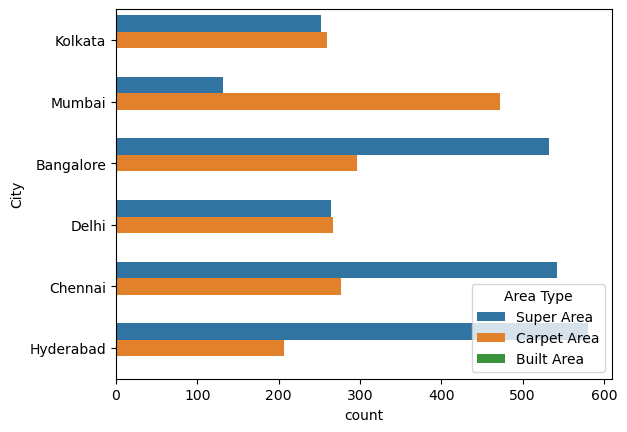

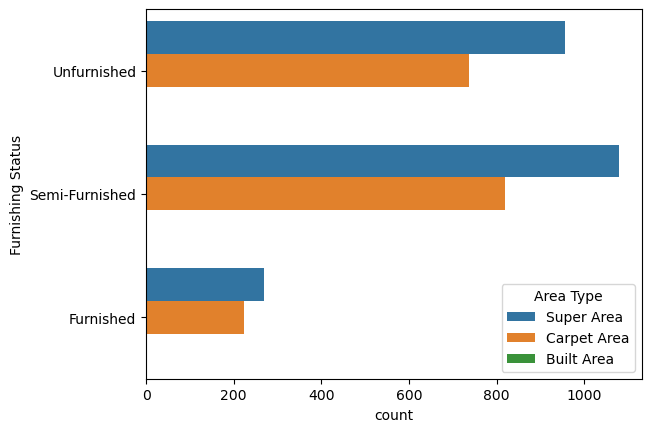

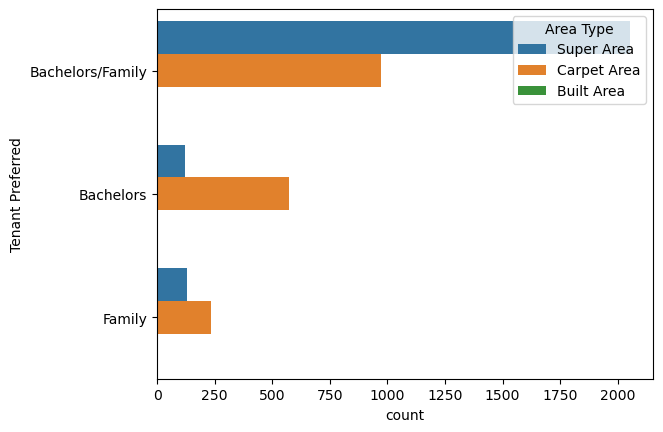

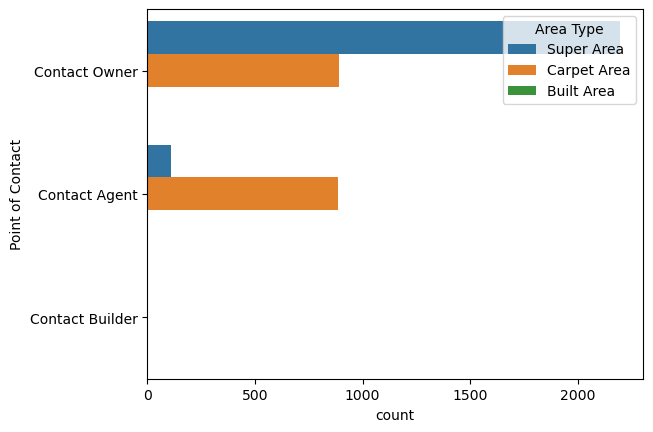

In [8]:
# diffrentiated with Area Type
num_columns = df.select_dtypes(exclude='object').columns
cat_columns = df.select_dtypes(include='object').columns

cat_columns = cat_columns.delete(0)
cat_columns = cat_columns.delete(0)
cat_columns = cat_columns.delete(0)
cat_columns = cat_columns.delete(0)



for c in num_columns:
    plt.figure()
    sns.boxplot(y=c, x = "Area Type",data=df)
    plt.show()
    
for c in cat_columns:
    plt.figure()
    sns.countplot(y=c, hue = "Area Type",data=df)
    plt.show()

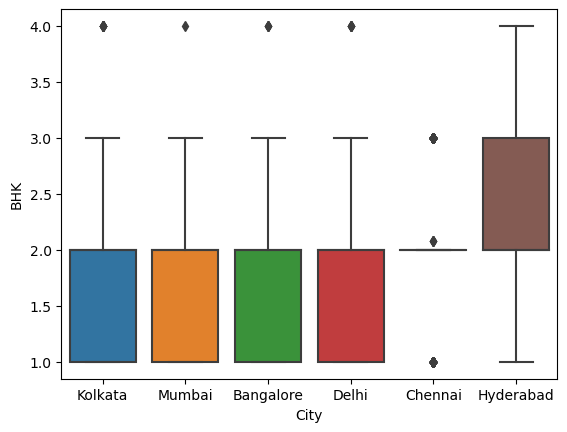

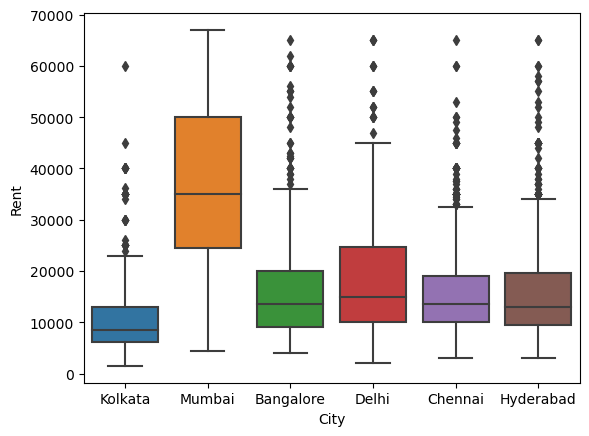

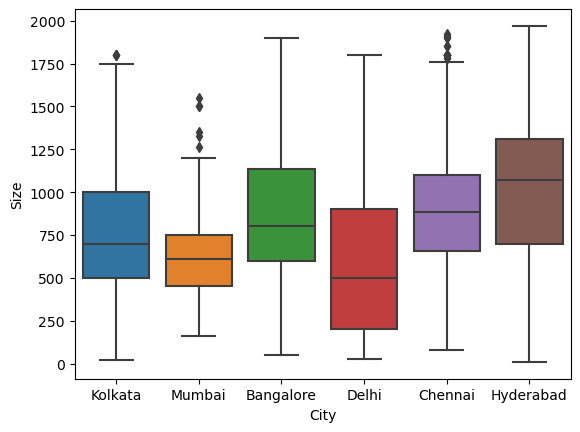

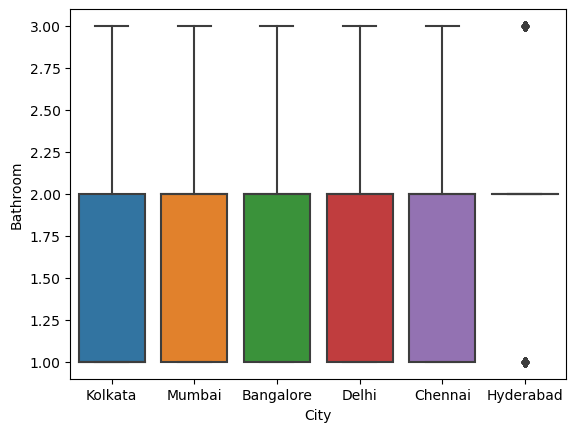

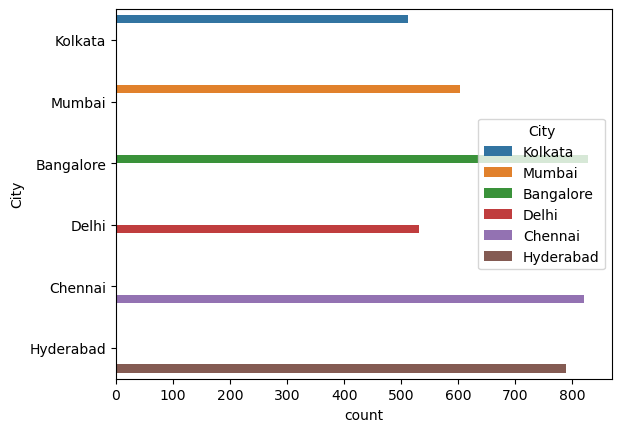

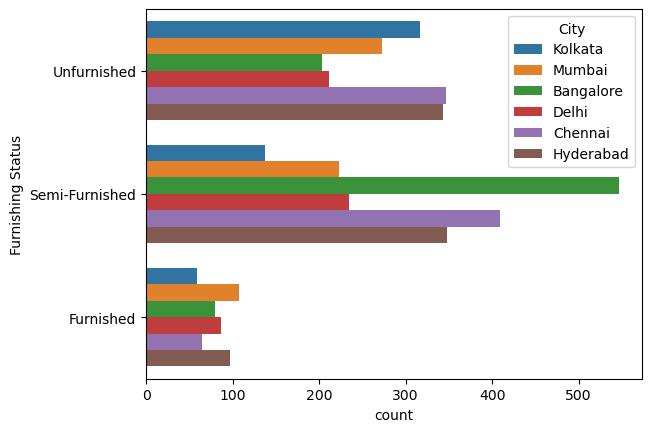

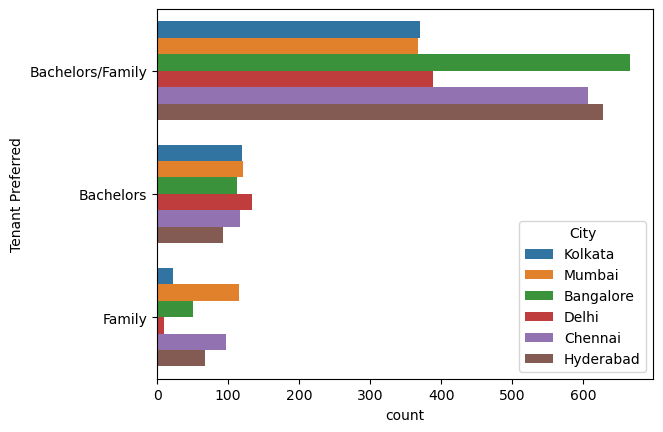

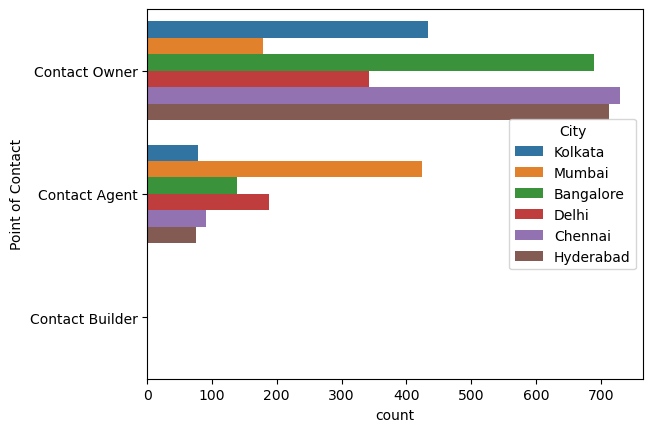

In [9]:
# diffrentiated with City
num_columns = df.select_dtypes(exclude='object').columns

for c in num_columns:
    plt.figure()
    sns.boxplot(y=c, x = "City",data=df)
    plt.show()

for c in cat_columns:
    plt.figure()
    sns.countplot(y=c, hue = "City",data=df)
    plt.show()

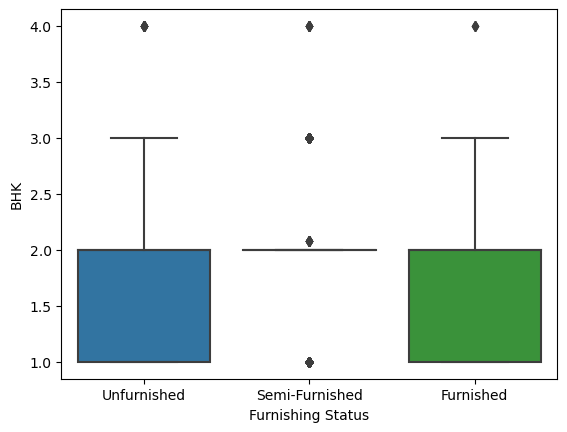

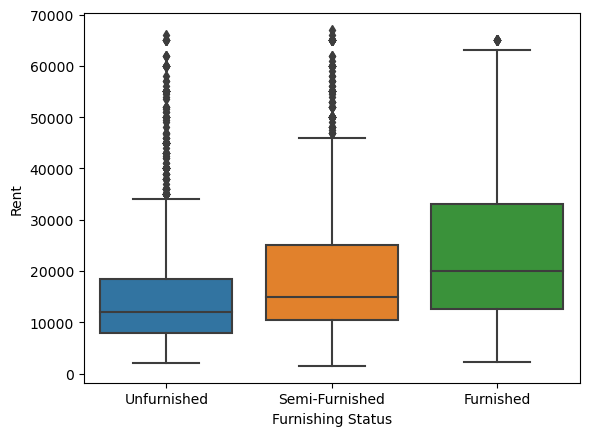

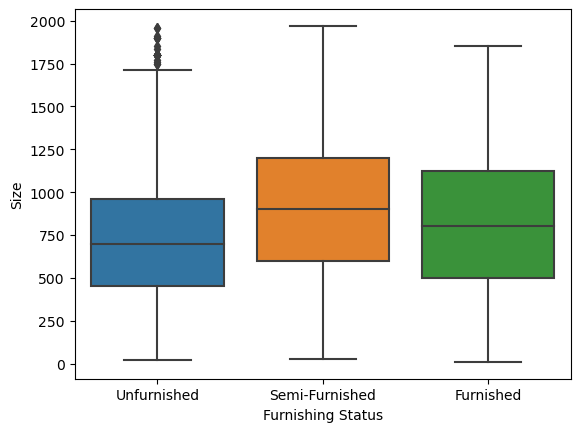

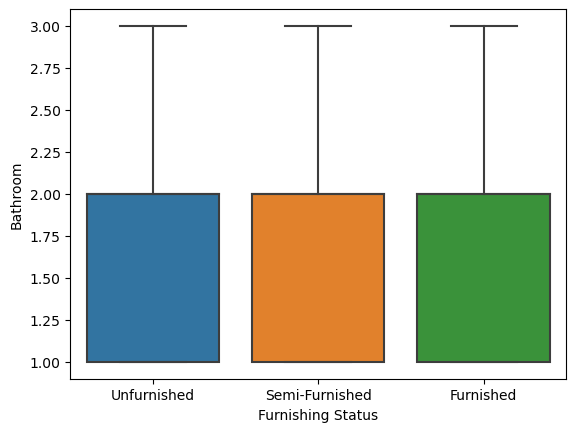

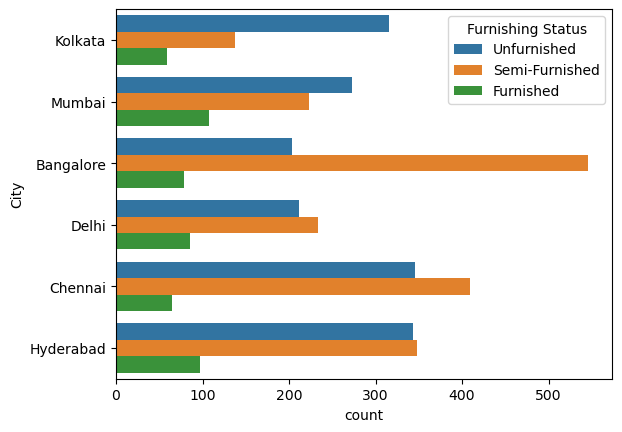

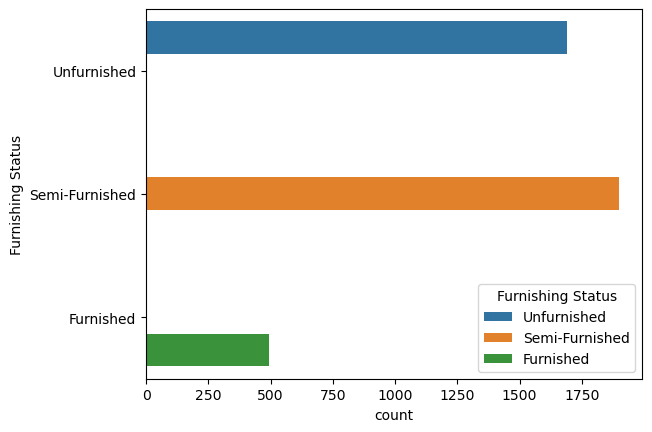

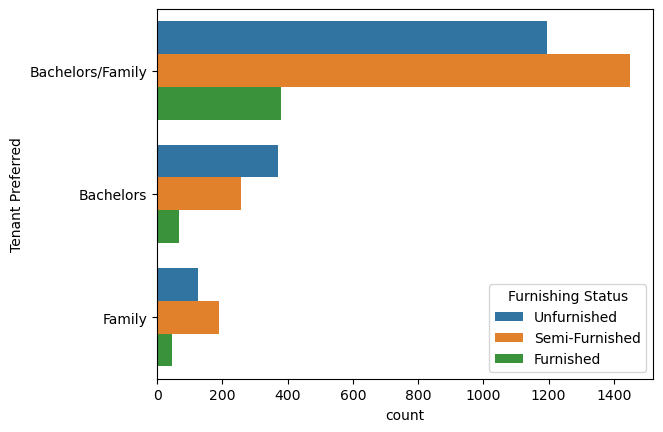

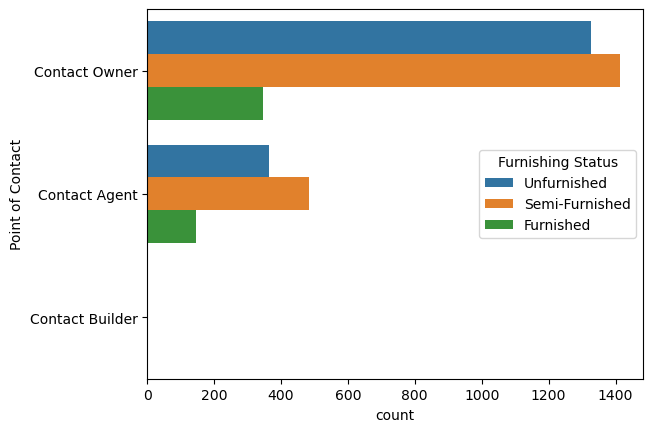

In [10]:
# diffrentiated with Furnishing Status
num_columns = df.select_dtypes(exclude='object').columns

for c in num_columns:
    plt.figure()
    sns.boxplot(y=c, x = "Furnishing Status",data=df)
    plt.show()
for c in cat_columns:
    plt.figure()
    sns.countplot(y=c, hue = "Furnishing Status",data=df)
    plt.show()

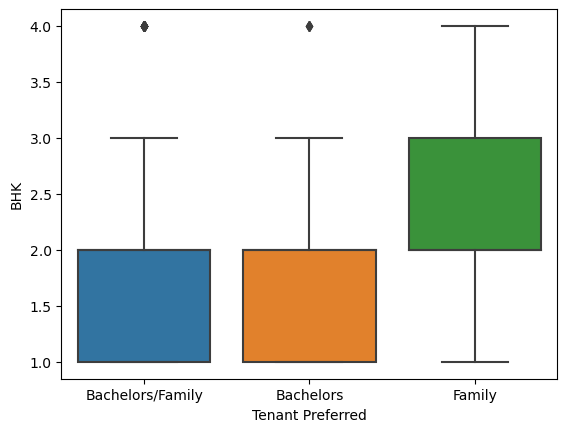

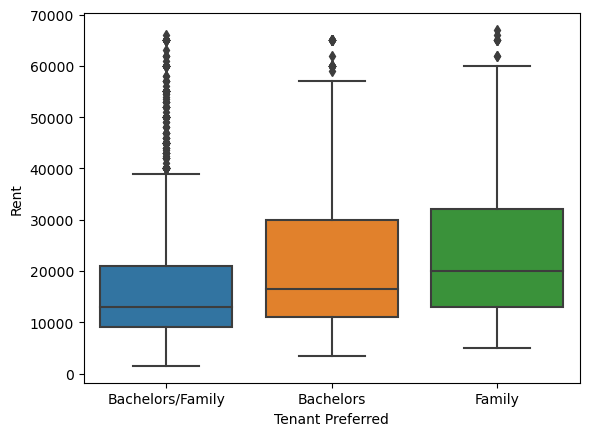

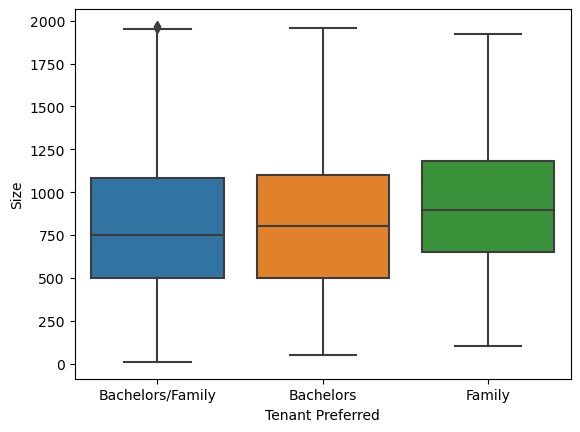

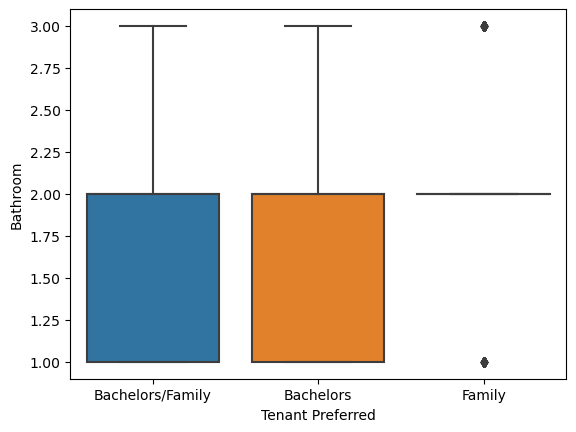

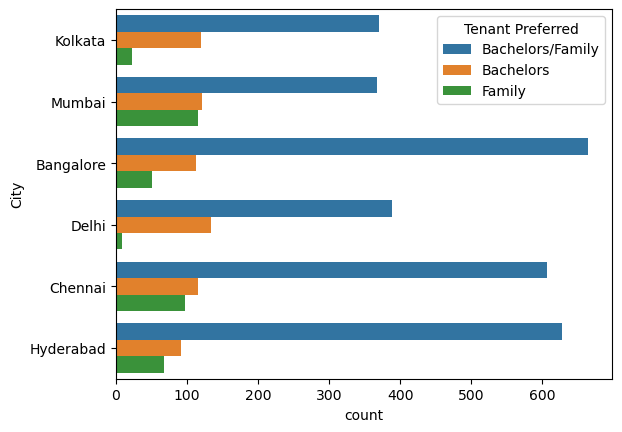

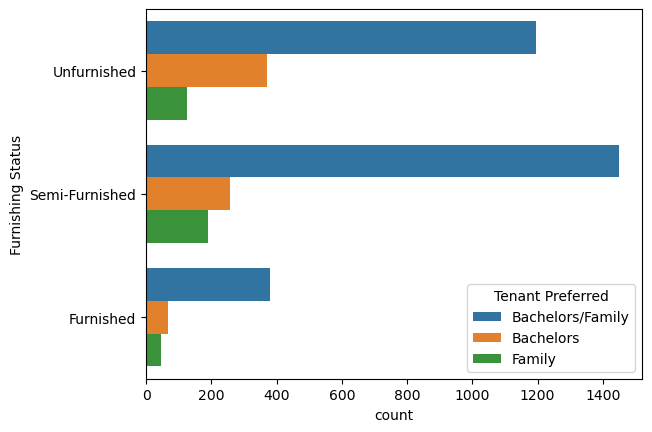

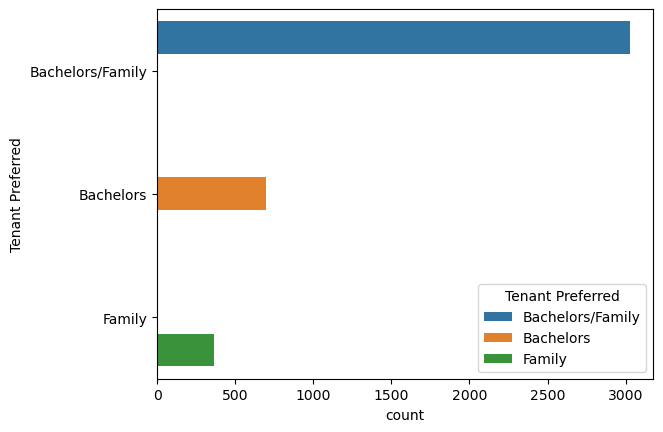

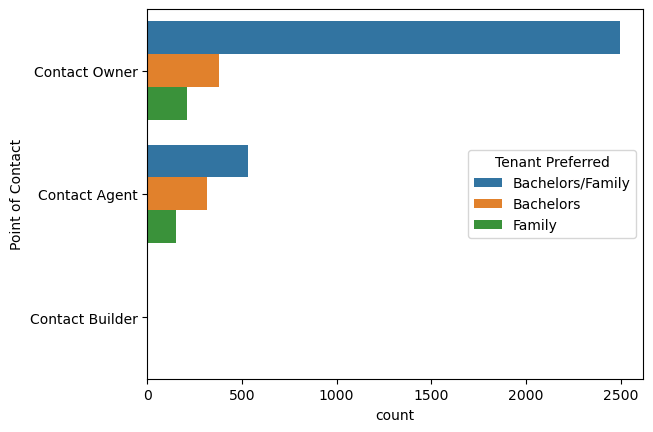

In [11]:
#diffrentiated with Tenant Preferred
num_columns = df.select_dtypes(exclude='object').columns

for c in num_columns:
    plt.figure()
    sns.boxplot(y=c, x = "Tenant Preferred",data=df)
    plt.show()
    
for c in cat_columns:
    plt.figure()
    sns.countplot(y=c, hue = "Tenant Preferred",data=df)
    plt.show()

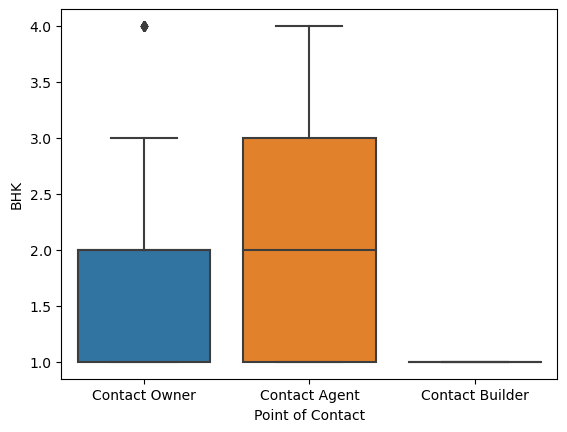

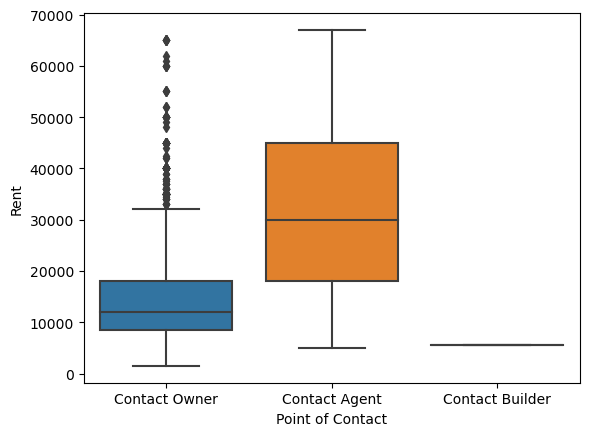

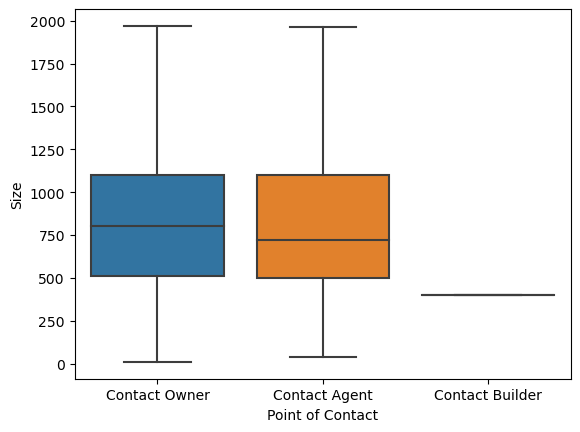

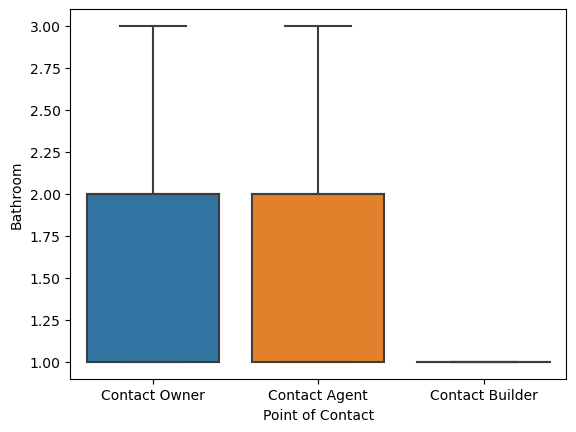

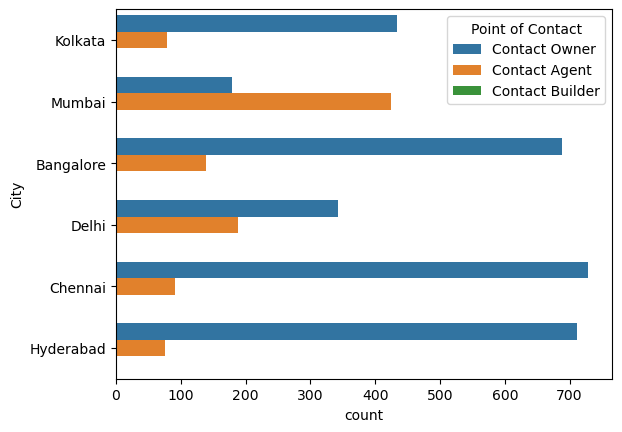

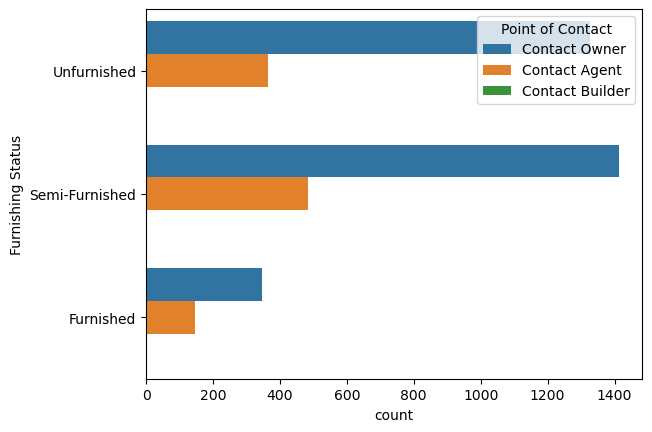

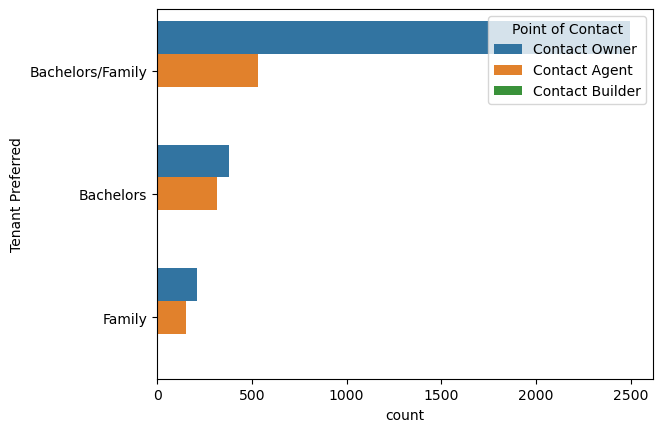

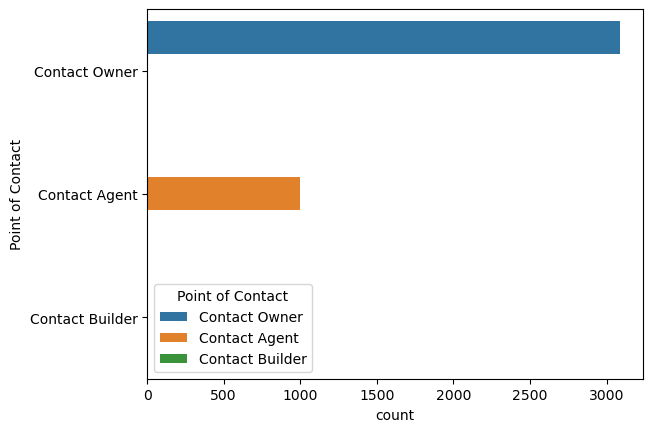

In [12]:
#diffrentiated with Point of Contact
num_columns = df.select_dtypes(exclude='object').columns

for c in num_columns:
    plt.figure()
    sns.boxplot(y=c, x = "Point of Contact",data=df)
    plt.show()

for c in cat_columns:
    plt.figure()
    sns.countplot(y=c, hue = "Point of Contact",data=df)
    plt.show()

Text(0, 0.5, 'Rent')

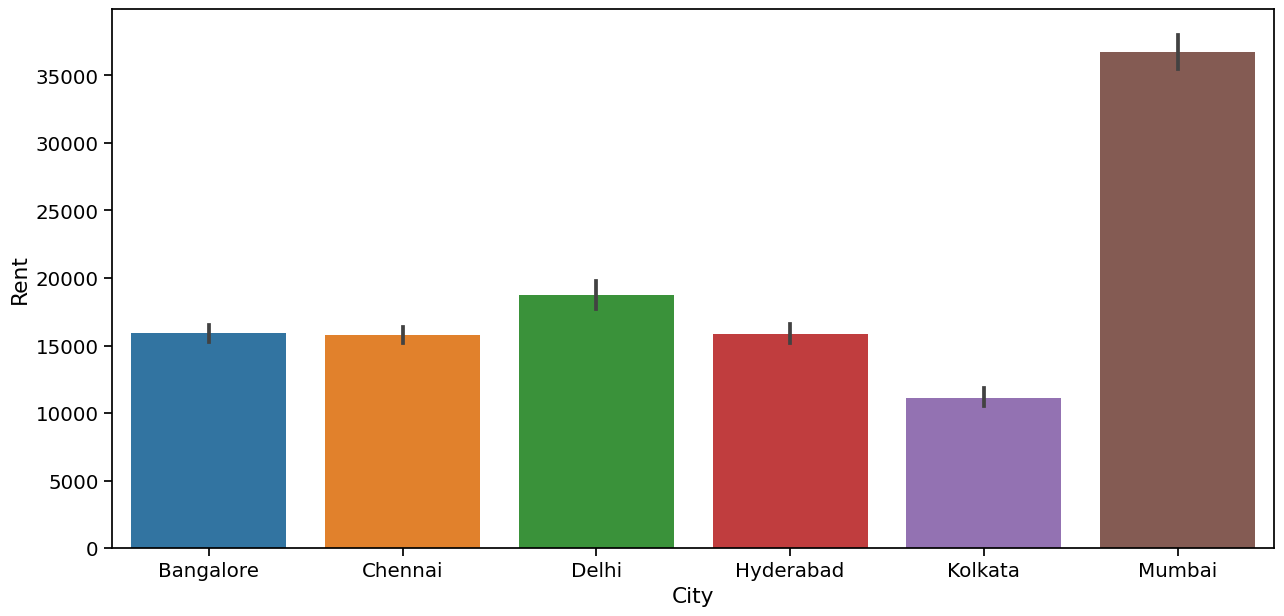

In [13]:
# plot Rent vs City
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=df['City'].sort_values(ascending=True), 
                y=df['Rent'], 
                )
plt.ylabel('Rent')



Mumbai has the highest Rent followed by Delhi

Text(0, 0.5, 'Rent')

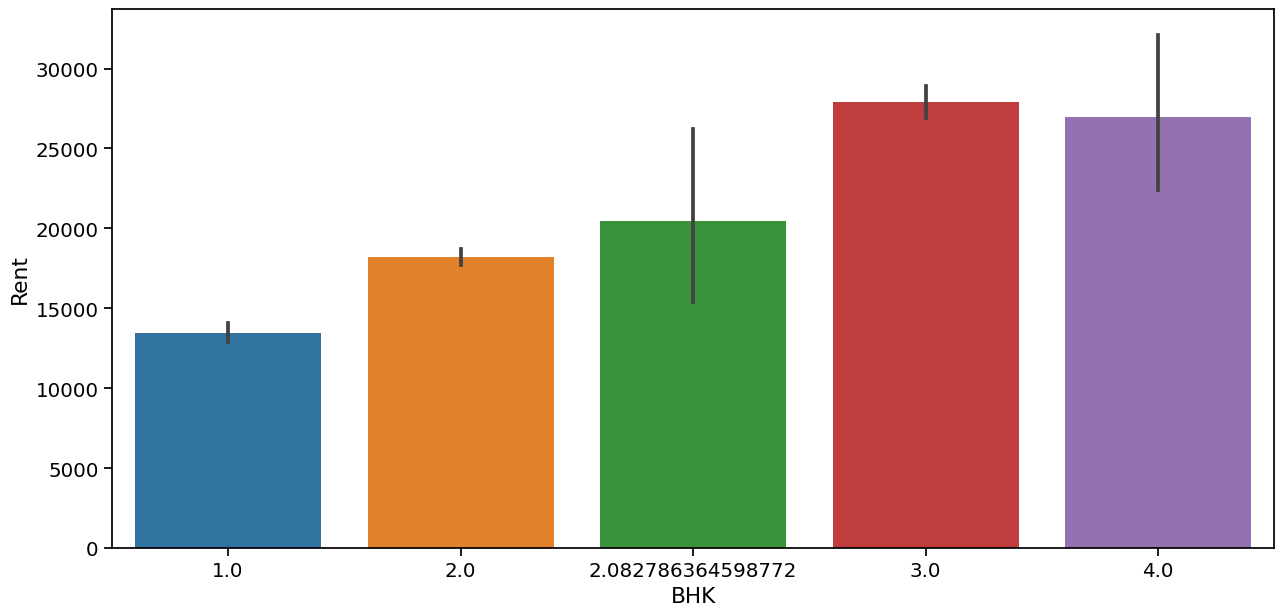

In [14]:
# plot Rent vs number of rooms
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=df['BHK'].sort_values(ascending=True), 
                y=df['Rent'], 
                )
plt.ylabel('Rent')



we see that the highest rent is for houses with 5 rooms not 6

Text(0, 0.5, 'Rent')

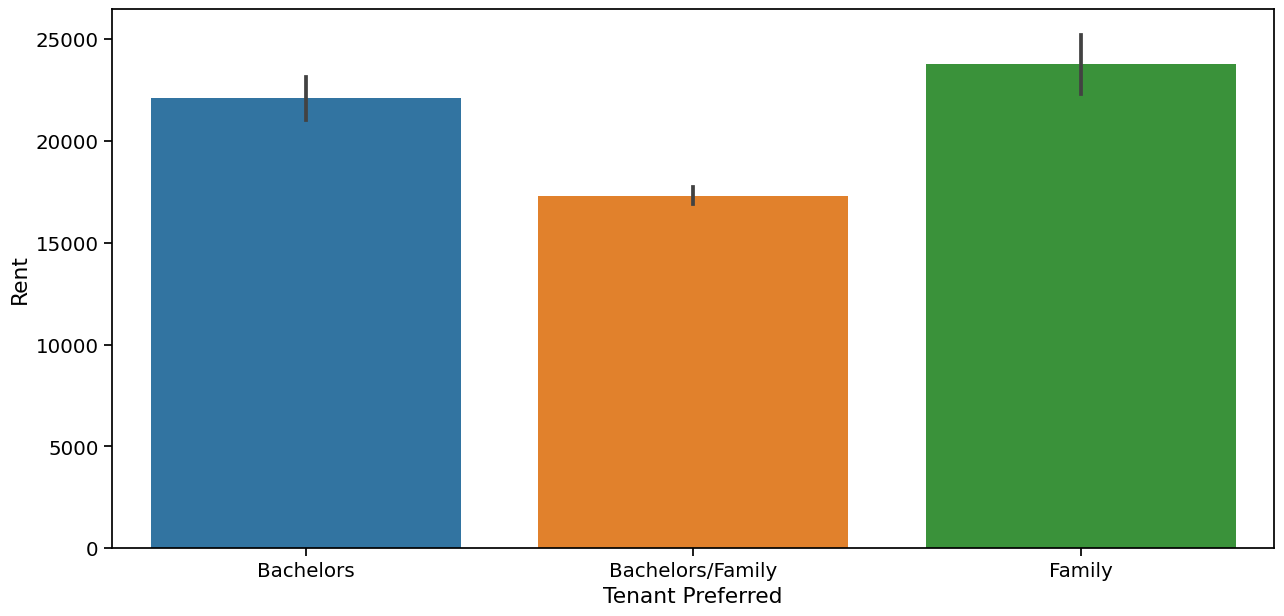

In [15]:

# plot Rent vs Tenant Preferred
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=df['Tenant Preferred'].sort_values(ascending=True), 
                y=df['Rent'], 
                )
plt.ylabel('Rent')

Text(0, 0.5, 'Rent')

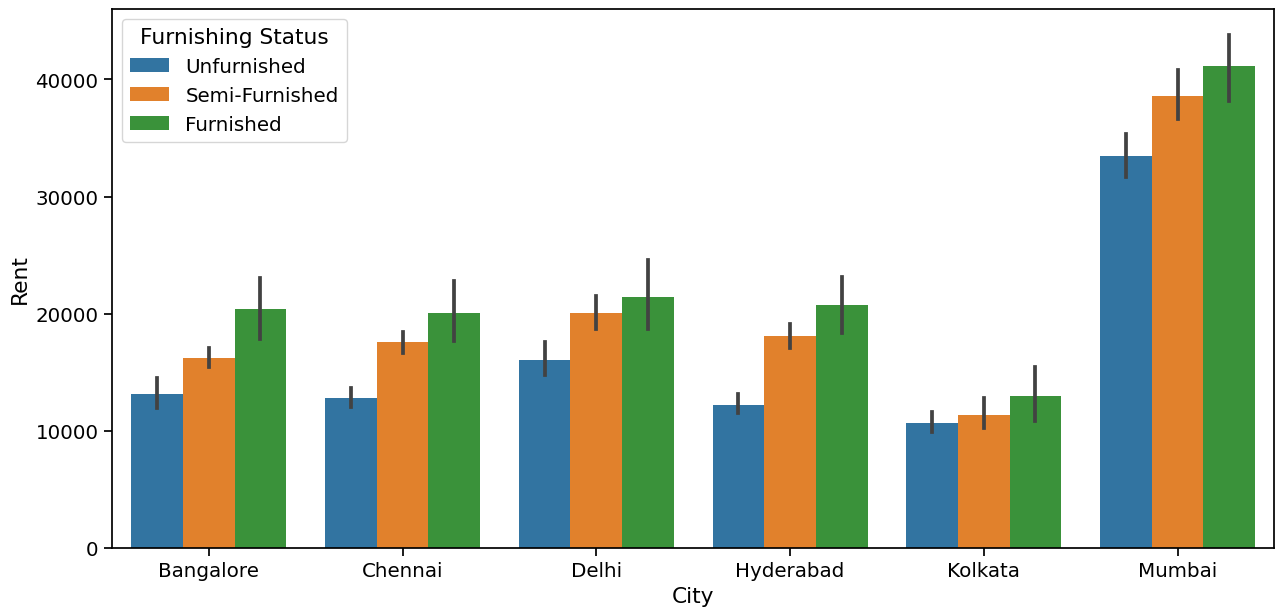

In [16]:
# 
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=df['City'].sort_values(ascending=True), 
                y=df['Rent'],
                hue= df['Furnishing Status'] 
                )
plt.ylabel('Rent')


<AxesSubplot:>

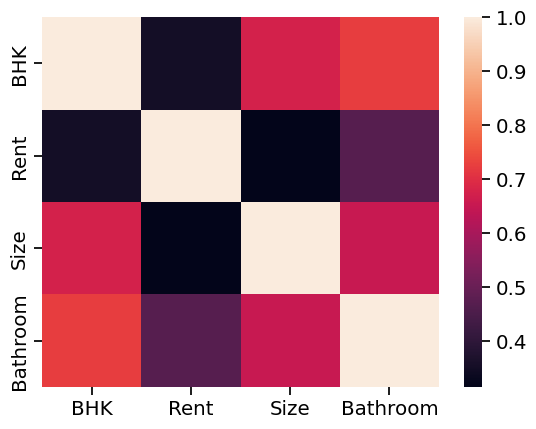

In [17]:
sns.heatmap(df.corr())

Furnished Flat definitely has the highest rent (with the exception of Hyderabad). Also, a furnished flat in Mumbai will be the costliest if you are willing to rent a Flat/Apartment in case of these cities

Text(0, 0.5, 'Rent')

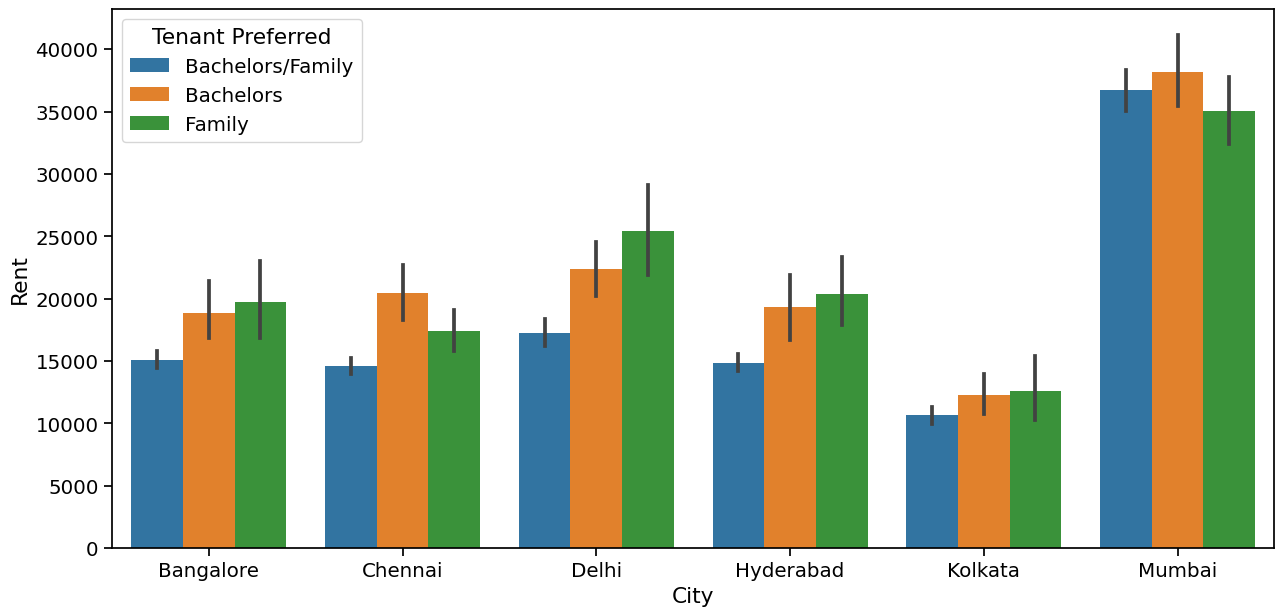

In [18]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=df['City'].sort_values(ascending=True), 
                y=df['Rent'],
                hue= df['Tenant Preferred'] 
                )
plt.ylabel('Rent')


In Chennai, Delhi and Mumbai, Bachelors usually have to pay more rent compared to others

# <p style="text-align: center;"><b>Data Preprocessing</b></p>

In [19]:
# we first need to convert our categorical data into a numerical representation for use in our model

# Splitting Floor Feature into Floor Level and Total Floors to get better insights
df = df.join(df['Floor'].str.split(' out of ', 1, expand=True).rename(columns={0:'Floor Level', 1:'Total Floors'}))
df['Floor Level'] = df.apply(
                        lambda x: 0 if x['Floor Level'] =='Ground'
                        else ( -1 if x['Floor Level'] =='Lower Basement' 
                              else ( x['Total Floors'] if x['Floor Level'] =='Upper Basement' 
                                    else (x['Floor Level']))), axis=1)

df.drop('Floor', axis=1, inplace=True)
df = df.dropna()
df['Floor Level'] = df['Floor Level'].astype(int)
df['Total Floors'] = df['Total Floors'].astype(int)
# display(df.sample())


In [20]:
# upon further analysis we can see that Point of Contact has only one entry of Contact Builder with the rest being Contact Owner/Agent
# so we can drop this entry as it would not be any useful for our model
print(df['Point of Contact'].value_counts())
print()
print(df['Area Type'].value_counts())

df = df[~df['Point of Contact'].str.contains("Contact Builder")]

Contact Owner      3081
Contact Agent       996
Contact Builder       1
Name: Point of Contact, dtype: int64

Super Area     2300
Carpet Area    1776
Built Area        2
Name: Area Type, dtype: int64


In [21]:
# we also need to convert the posted on column into a datetime object
# then split it into more useful columns with more descriptive values each

df['Posted On'] = pd.to_datetime(df['Posted On'])

df['Quarter Posted'] = df['Posted On'].dt.quarter
df['Month Posted'] = df['Posted On'].dt.month
df['Day Of Week Posted'] = df['Posted On'].dt.day_of_week
df['Day Posted'] = df['Posted On'].dt.day

df.drop('Posted On', axis = 1, inplace= True)

In [22]:
# drop all duplicates not to skew our model
print(df.duplicated().sum())
df = df.drop_duplicates()

# remove the area locality column
# as its not practical to use it in our model
df = df.drop('Area Locality', axis= 1)

# apply one hot encoding to the rest of our categorical data
columns = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']
for col in columns:
    one_hot = pd.get_dummies(df[col], prefix=col)
    df = df.drop(col, axis=1)
    df = df.join(one_hot)


0


# <p style="text-align: center;"><b>Model Building</b></p>

In [23]:
# Now for building our model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# first we split the data into train and test sets
X = df.drop('Rent', axis= 1)
y = df['Rent']

# calculate the z-score of the data
yZScore = (y - y.mean())/y.std()

X_train, X_test, y_train, y_test = train_test_split(X, yZScore, test_size= 0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(np.c_[X_train,y_train])

A_train = scaler.transform(np.c_[X_train,y_train])
X_train = A_train[:,:-1]
y_train = A_train[:,-1]

A_test = scaler.transform(np.c_[X_test,y_test])
X_test = A_test[:,:-1]
y_test = A_test[:,-1]

In [24]:
# Regression Analysis: Mean Squared Error Metric
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Regression Analysis: Mean Squared Error Metric
from sklearn.metrics import mean_squared_error

## OLS
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)
mse_pred1 = mean_squared_error(y_test, y_pred1)
rmse_pred1 = np.sqrt(mean_squared_error(y_test, y_pred1))
print('OLS: The MSE is:', mse_pred1)
print('OLS: The RMSE is:', rmse_pred1)
print()

## Ridge
from sklearn.linear_model import RidgeCV
reg2 = RidgeCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1], fit_intercept=False,cv=10).fit(X_train, y_train)
y_pred2 = reg2.predict(X_test)
mse_pred2 = mean_squared_error(y_test, y_pred2)
rmse_pred2 = np.sqrt(mean_squared_error(y_test, y_pred2))
print('Ridge: The MSE is:', mse_pred2)
print('Ridge: The RMSE is:', rmse_pred2)
print()

## Lasso
from sklearn.linear_model import LassoCV
reg3 = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2], fit_intercept=False,cv=10, random_state=0).fit(X_train, y_train)
y_pred3 = reg3.predict(X_test)
mse_pred3 = mean_squared_error(y_test, y_pred3)
rmse_pred3 = np.sqrt(mean_squared_error(y_test, y_pred3))
print('Lasso: The MSE is:', mse_pred3)
print('Lasso: The RMSE is:', rmse_pred3)
print()

OLS: The MSE is: 0.29591796108156665
OLS: The RMSE is: 0.5439834198590676

Ridge: The MSE is: 0.2959180580801804
Ridge: The RMSE is: 0.5439835090149153

Lasso: The MSE is: 0.2962360646947236
Lasso: The RMSE is: 0.5442757248809867



## Model Comparison

Based on the performance measures, we can compare the three models: Ordinary Least Squares (OLS), Ridge, and Lasso.

| Model | MSE       | RMSE      |
|-------|-----------|-----------|
| OLS   | 0.295667  | 0.543753  |
| Ridge | 0.295918  | 0.543983  |
| Lasso | 0.296236  | 0.544275  |

From the table above, we can see that the OLS model has the lowest MSE and RMSE values. However, the differences between the three models are very small.

Even after testing the Ridge and Lasso models with many alpha values and differnt ranges hasn't produced any better results than the OLS model. The OLS model has always had the lowest MSE and RMSE values.

## Final Model

Based on the performance measures, we can select the OLS model as our final model. The coefficients of this model can be obtained using `reg1.coef_`.

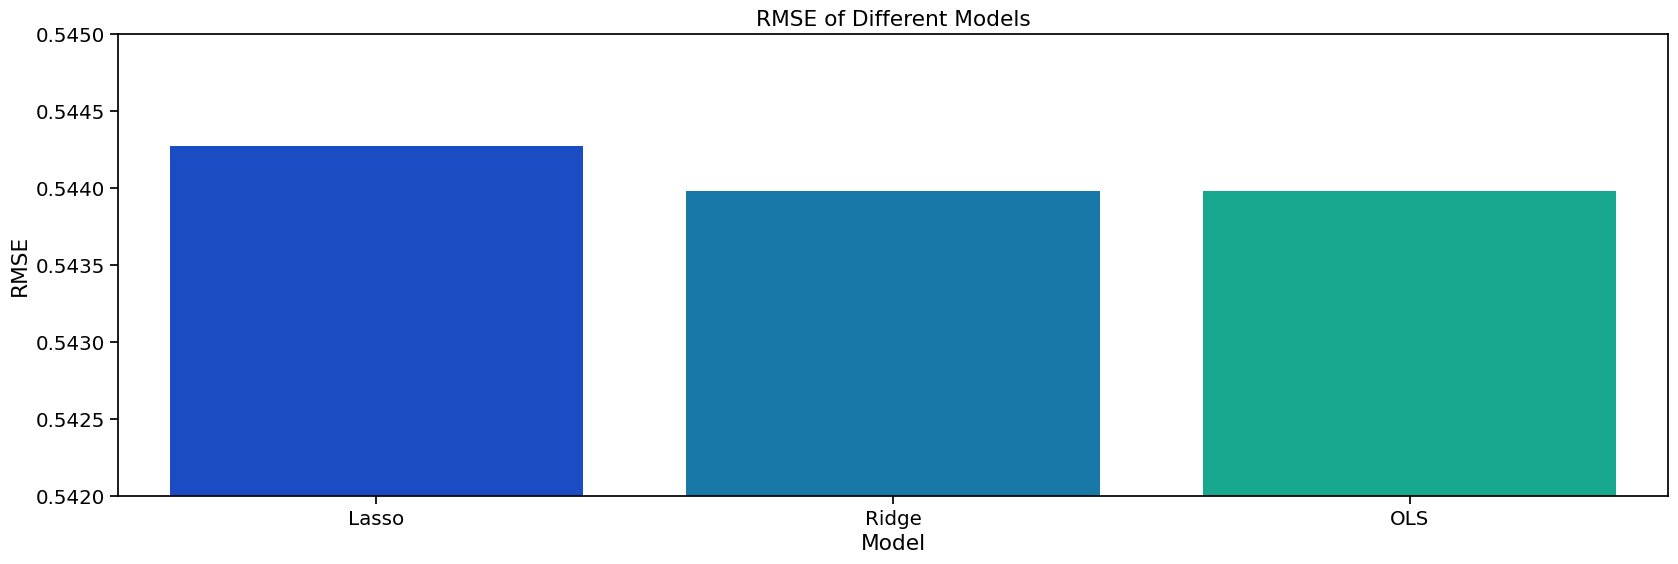

In [25]:
results = {'OLS': rmse_pred1, 'Ridge': rmse_pred2, 'Lasso': rmse_pred3}

results_df = pd.DataFrame(results, index=range(0,1)).T.rename(columns={0: 'RMSE'}).sort_values('RMSE', ascending=False)
results_df.T

plt.figure(figsize = (20, 6))
sns.barplot(x=results_df.index, y=results_df['RMSE'], palette='winter')
plt.ylim(0.542, 0.545)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of Different Models');

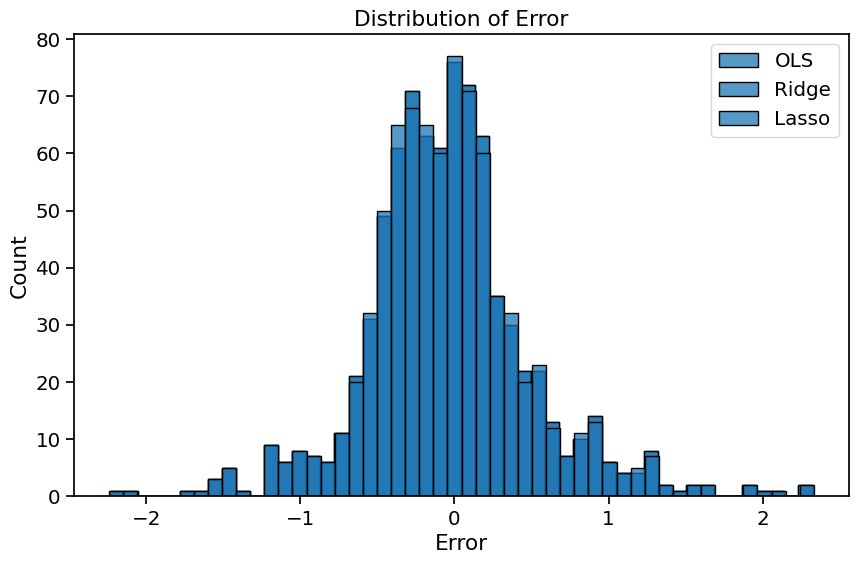

In [26]:
# Distribution of error using histogram
plt.figure(figsize = (10, 6))
sns.histplot(y_test - y_pred1, bins=50, label='OLS')
sns.histplot(y_test - y_pred2, bins=50, label='Ridge')
sns.histplot(y_test - y_pred3, bins=50, label='Lasso')
plt.legend()
plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Distribution of Error');


In [27]:
# Details of the best estimates
print('The best coefficient estimates are:')
print(pd.DataFrame({'Variable': X.columns, 'Coefficient': reg1.coef_}))


The best coefficient estimates are:
                             Variable  Coefficient
0                                 BHK     0.184365
1                                Size     0.203365
2                            Bathroom     0.130309
3                         Floor Level     0.007181
4                        Total Floors     0.123655
5                      Quarter Posted     0.046918
6                        Month Posted    -0.017159
7                  Day Of Week Posted     0.002700
8                          Day Posted    -0.000981
9                Area Type_Built Area    -0.001906
10              Area Type_Carpet Area     0.007488
11               Area Type_Super Area    -0.007391
12                     City_Bangalore    -0.062807
13                       City_Chennai    -0.083098
14                         City_Delhi     0.025029
15                     City_Hyderabad    -0.129675
16                       City_Kolkata    -0.114798
17                        City_Mumbai     0.39

# <p style="text-align: center;"><b>General Methodology Guidelines</b></p>

1. **Importing the necessary libraries**: Make sure to have the necessary libraries installed and imported. In this project, **`pandas`** is used for data manipulation and analysis, **`numpy`** is used for numerical computing, and **`sklearn`** is used for machine learning.

2. **Reading and cleaning the data**: Read the data from the provided file using **`pandas`**. In this project, the data is stored in a CSV file. After reading the data, perform any necessary cleaning steps. In this project, missing values are fixed by replacing them with either the mode or mean value of the corresponding column. Outliers are also removed by calculating the interquartile range (IQR) and deleting rows that fall outside of the calculated bounds.

3. **Preprocessing the data**: Convert categorical data into numerical data using techniques such as one-hot encoding. In this project, several categorical columns are converted into numerical data using one-hot encoding. The data is then split into training and testing sets and scaled using a **`StandardScaler`**.

4. **Building and evaluating the model**: Use a linear regression model from **`sklearn`** to fit the training data. Evaluate the model's performance on the testing data using metrics such as mean squared error (MSE) and root mean squared error (RMSE). In this project, three different linear regression models are compared: Ordinary Least Squares (OLS), Ridge, and Lasso.

5. **Interpreting the results**: Interpret the coefficients of the final model to understand the relationship between the features and the target variable. In this project, the OLS model is selected as the final model based on its performance measures.
